In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [72]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [74]:
data.columns = data.columns.str.lower()
data.head(2)

,r&d spend,administration,marketing spend,state,profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [75]:
data['state'].value_counts()

California    17
New York      17
Florida       16
Name: state, dtype: int64

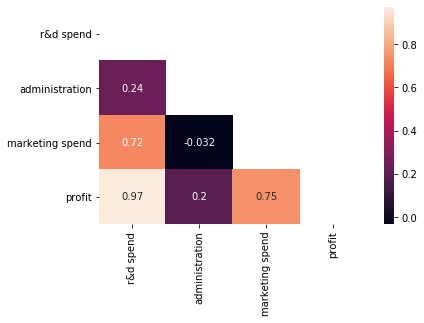

In [76]:
mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=mask)

In [77]:
data['state'] = data['state'].astype('category').cat.codes
data.head()

,r&d spend,administration,marketing spend,state,profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### Preprocessing Data

In [78]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [79]:
x.head(2)

,r&d spend,administration,marketing spend,state
0,165349.2,136897.80,471784.10,2
1,162597.7,151377.59,443898.53,0


In [80]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: profit, dtype: float64

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

,r&d spend,administration,marketing spend,state
13,91992.39,135495.07,252664.93,0
39,38558.51,82982.09,174999.30,0
30,61994.48,115641.28,91131.24,1
45,1000.23,124153.04,1903.93,2
17,94657.16,145077.58,282574.31,2
48,542.05,51743.15,0.00,2
26,75328.87,144135.98,134050.07,1
25,64664.71,139553.16,137962.62,0
32,63408.86,129219.61,46085.25,0
19,86419.70,153514.11,0.00,2


In [82]:
s = StandardScaler()

x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [83]:
x_train[:5, :]

array([[ 0.34202149,  0.22787678,  0.12425038,  0.        ],
       [ 1.36207849, -1.0974737 ,  1.14990688,  0.        ],
       [-0.71081297, -2.5770186 , -0.34136825, -1.24034735],
       [ 0.90611438,  1.0172367 ,  0.66890185,  1.24034735],
       [ 1.40997088, -0.09115403,  1.30006861,  1.24034735]])

### Linear Regression

In [84]:
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Accuracy in training : {model.score(x_train, y_train)}')
print(f'Accuracy in test : {model.score(x_test, y_test)}')

# Another way
y_pred = model.predict(x_test)
print(f'Accuracy in test : {r2_score(y_test, y_pred)}')

Accuracy in training : 0.9535928780839645
Accuracy in test : 0.9000614254946251
Accuracy in test : 0.9000614254946251


### Polynomial Model

In [85]:
poly_model = PolynomialFeatures()
x_poly_train = poly_model.fit_transform(x_train)
x_poly_test = poly_model.transform(x_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)
print(f'Accuracy in training : {model.score(x_poly_train, y_train)}')
print(f'Accuracy in test : {model.score(x_poly_test, y_test)}')

# Another way
y_pred = model.predict(x_poly_test)
print(f'Accuracy in test : {r2_score(y_test, y_pred)}')

Accuracy in training : 0.9616769707125538
Accuracy in test : 0.8920629128643286
Accuracy in test : 0.8920629128643286


In [86]:
poly_model = PolynomialFeatures(degree=3)
x_poly_train = poly_model.fit_transform(x_train)
x_poly_test = poly_model.transform(x_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)
print(f'Accuracy in training : {model.score(x_poly_train, y_train)}')
print(f'Accuracy in test : {model.score(x_poly_test, y_test)}')

# Another way
y_pred = model.predict(x_poly_test)
print(f'Accuracy in test : {r2_score(y_test, y_pred)}')

Accuracy in training : 0.9622385245783447
Accuracy in test : -7.596703794820554
Accuracy in test : -7.596703794820554


> WE can observe that the best accuracy comes from **linear regression model**

#### <font color='blue'>Lets try to apply linear regression model without making scaling for features and see the accuracy if it will changes a lot or not!!.

In [87]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head(2)

,r&d spend,administration,marketing spend,state
12,93863.75,127320.38,249839.44,1
4,142107.34,91391.77,366168.42,1


In [88]:
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Accuracy in training : {model.score(x_train, y_train)}')
print(f'Accuracy in test : {model.score(x_test, y_test)}')

Accuracy in training : 0.9535928780839645
Accuracy in test : 0.9000614254946404


> It's the same accuracy. That's why linear regression model doesn't be affected with feature scalling according to other algorithms

### Try decision tree

In [89]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
print(f'Accuracy in training : {tree_model.score(x_train, y_train)}')
print(f'Accuracy in test : {tree_model.score(x_test, y_test)}')

Accuracy in training : 1.0
Accuracy in test : 0.9033850458398873


#### Lets try the last thing which is **removing the column with the lowest correlation and see the accuracy.**

In [90]:
df = data.copy()
df = df.drop(columns = ['administration'])
display(df.head(2))
display(data.head(2))

,r&d spend,marketing spend,state,profit
0,165349.2,471784.10,2,192261.83
1,162597.7,443898.53,0,191792.06


,r&d spend,administration,marketing spend,state,profit
0,165349.2,136897.80,471784.10,2,192261.83
1,162597.7,151377.59,443898.53,0,191792.06


In [91]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head(2)

,r&d spend,marketing spend,state
12,93863.75,249839.44,1
4,142107.34,366168.42,1


In [92]:
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Accuracy in training : {model.score(x_train, y_train)}')
print(f'Accuracy in test : {model.score(x_test, y_test)}')

Accuracy in training : 0.9518861025597708
Accuracy in test : 0.9166761950835466


### Decision Tree Regressor

In [93]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)
print(f'Accuracy in training : {tree_model.score(x_train, y_train)}')
print(f'Accuracy in test : {tree_model.score(x_test, y_test)}')

Accuracy in training : 1.0
Accuracy in test : 0.8740142007426543


In [94]:
# Changing hyperparameters
parameters = {'max_depth':[20,35,50,100,150,200]}
tree_model = DecisionTreeRegressor(random_state=42)

grid_model = GridSearchCV(tree_model, parameters)
grid_model.fit(x_train, y_train)

C:\Users\habiba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [20, 35, 50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
grid_model.best_params_

{'max_depth': 20}

In [96]:
grid_model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [97]:
grid_model.best_score_

0.9114677779093057

In [98]:
grid_model.score(x_test, y_test)

0.8740142007426543

In [99]:
tree_model = grid_model.best_estimator_
tree_model.fit(x_train, y_train)
print(f'Accuracy in training : {tree_model.score(x_train, y_train)}')
print(f'Accuracy in test : {tree_model.score(x_test, y_test)}')

Accuracy in training : 1.0
Accuracy in test : 0.8740142007426543


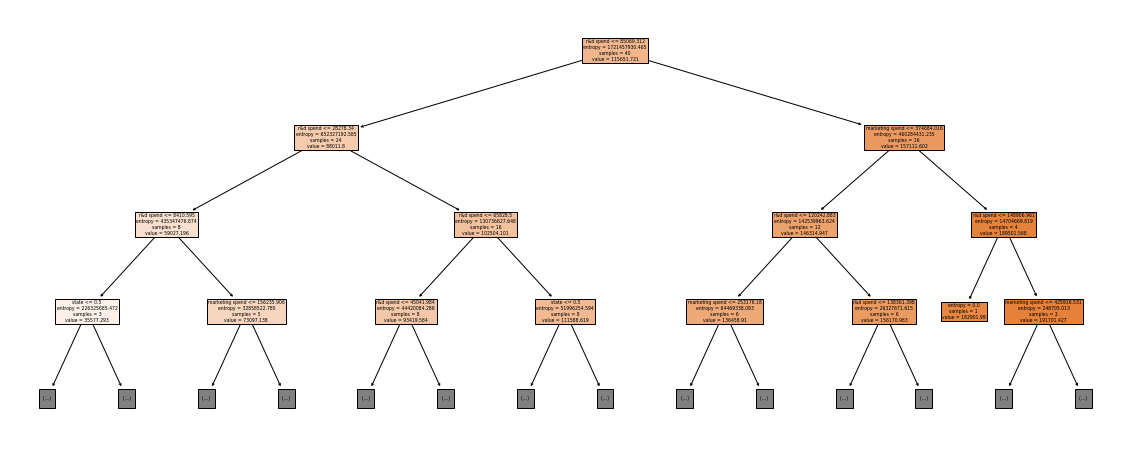

In [106]:
plt.figure(figsize=(20,8))
plot_tree(tree_model, feature_names=df.columns, filled=True, max_depth=3);